In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [86]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.219500,0.10880,...,28.19,28.18,195.90,2384.0,0.1272,0.47250,0.58070,0.18410,0.2833,0.08858
44,85638502,M,13.17,21.81,85.42,531.5,0.09714,0.10470,0.082590,0.05252,...,16.23,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618
156,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.185500,0.10540,...,20.47,25.11,132.90,1302.0,0.1418,0.34980,0.35830,0.15150,0.2463,0.07738
179,873586,B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,...,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
227,88147102,B,15.00,15.51,97.45,684.5,0.08371,0.10960,0.065050,0.03780,...,16.41,19.31,114.20,808.2,0.1136,0.36270,0.34020,0.13790,0.2954,0.08362
195,875878,B,12.91,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.02377,...,13.88,22.00,90.81,600.6,0.1097,0.15060,0.17640,0.08235,0.3024,0.06949
40,855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.031100,0.02031,...,15.93,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146
170,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.12420,0.09391,0.2827,0.06771
370,9012315,M,16.35,23.29,109.00,840.4,0.09742,0.14970,0.181100,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.46650,0.70870,0.22480,0.4824,0.09614
41,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.14240,0.2964,0.09606


In [57]:
df.shape

(569, 32)

In [59]:
df.drop('id', axis=1, inplace=True)

In [67]:
from sklearn.preprocessing import LabelEncoder
l_encoder=LabelEncoder()

df['diagnosis']=l_encoder.fit_transform(df['diagnosis'])

In [68]:
x=df.drop('diagnosis', axis=1).values
y=df['diagnosis']

In [80]:
df.corr().abs().sort_values(by='diagnosis',ascending=False).style.background_gradient(cmap='ocean_r')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
concave points_worst,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,0.531062,0.119638,0.554897,0.538166,0.102007,0.483208,0.440472,0.602450,0.030413,0.215204,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,0.205151,0.719684,0.102242,0.721031,0.761213,0.217304,0.260516,0.226680,0.394999,0.103753,0.001000,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,0.253691,0.715065,0.111690,0.697201,0.757373,0.230691,0.204607,0.186904,0.358127,0.128121,0.037488,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_worst,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,0.231854,0.751548,0.083195,0.730713,0.811408,0.182195,0.199371,0.188353,0.342271,0.110343,0.022736,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


In [83]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [84]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(x)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=34)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [89]:
y_predict=knn.predict(x_test)

In [91]:
from sklearn.metrics import jaccard_score
print(jaccard_score(y_predict, y_test))

0.8717948717948718


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        79
           1       0.89      0.97      0.93        35

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [95]:
from sklearn.model_selection import cross_val_predict
crp=cross_val_predict(estimator=knn, X=X, y=y, cv=5)
print(classification_report(cvp, y))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       365
           1       0.93      0.97      0.95       204

    accuracy                           0.96       569
   macro avg       0.96      0.97      0.96       569
weighted avg       0.97      0.96      0.96       569



In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [108]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16])

In [112]:
knn_gscv.best_params_

{'n_neighbors': 9}

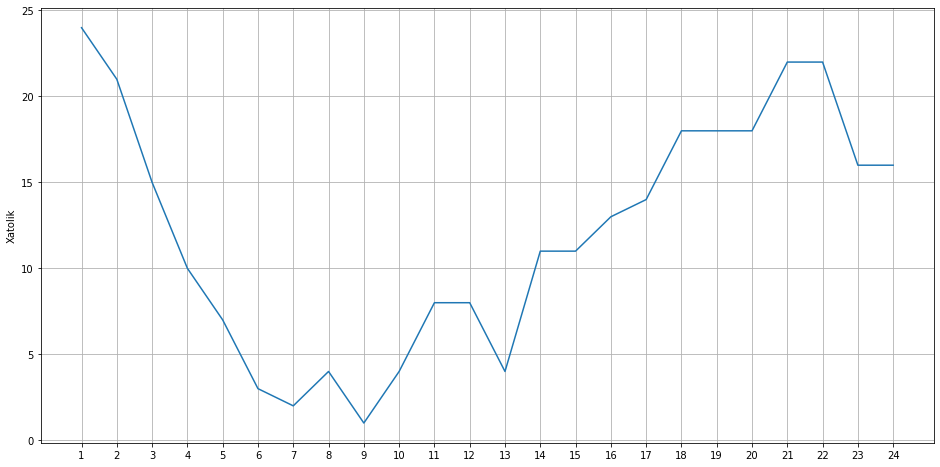

In [114]:
plt.figure(figsize=(16,8))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.grid()
plt.xticks(param_grid['n_neighbors'])
plt.ylabel('Xatolik')
plt.show()